In [2]:
%matplotlib ipympl

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np

from PIL import Image
from sklearn.cluster import KMeans, DBSCAN

Open the image

In [3]:
# open image

fp = "cropped_image.png"

# open image and convert to numpy array 
img = Image.open(fp)
img = np.array(img)

# convert RGBA to RGB (alpha channel is not needed)
img = img[:,:,:3]
img.shape

(183, 1061, 3)

Iterate over pixels. For each unique pixel, record their frequency

In [4]:
# loop over img pixels and create a dictionary of pixel values (R, G, B) and their frequency 
pixel_dist = {}

for i in range(0, img.shape[0]):
    for j in range(0, img.shape[1]):
        pixel = tuple(img[i, j, :])
        if pixel in pixel_dist:
            pixel_dist[pixel] += 1
        else:
            pixel_dist[pixel] = 1

Create a np array of the unique pixels, separate from the dist.

In [5]:
unique_pixel_count = len(pixel_dist.items())

unique_pixels = np.empty((unique_pixel_count, 3))
for i, (k, v) in enumerate(pixel_dist.items()):
    unique_pixels[i, :] = np.array(k)

In [14]:
unique_pixel_count

8854

Get normalized occurrence counts of every unique pixel

In [6]:
# Get the occurrence count for each unique pixel
occurrence_counts = np.array(list(pixel_dist.values()))

# Normalize the occurrence counts to be between 0 and 1
normalized_counts = (occurrence_counts - np.min(occurrence_counts)) / (np.max(occurrence_counts) - np.min(occurrence_counts))

Plot the correlation between minimum occurrence (normalized) and number of pixels that occur sufficiently frequent

Text(0, 0.5, 'Unique Colors')

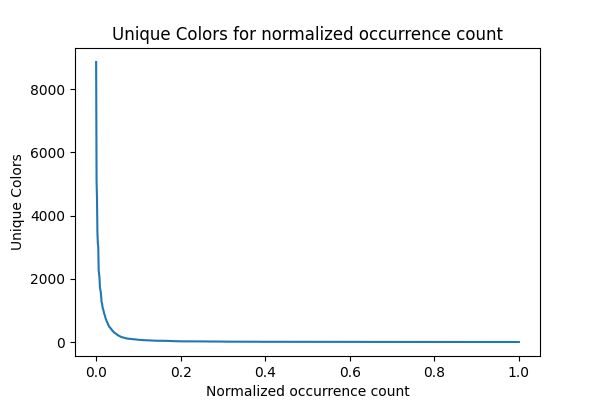

In [7]:
samples = 1000
good_occurrence_counts = np.empty(samples)

for i, n in enumerate(np.linspace(0, 1, samples)):
    good_occurrence_counts[i] = np.sum(normalized_counts >= n)

plt.figure(figsize=(6, 4))
plt.plot(np.linspace(0, 1, samples), good_occurrence_counts)
plt.title("Unique Colors for normalized occurrence count")
plt.xlabel("Normalized occurrence count")
plt.ylabel("Unique Colors")

Get the stats for distance between high occurrence pixels given the minimum occurrence count (norm) 

In [13]:
step = 1e-2
check_range = (0.01, 0.2)

for i, n in enumerate(np.arange(*check_range, step)):
    good_pixels = unique_pixels[np.where(normalized_counts >= n)]

    if good_pixels.shape[0] <= 1:
        continue # no distances for single pixel 
    
    # good_pixels has shape (good_pixel_count, 3). for each pixel, calculate the euclidean distance to every other pixel.
    # use numpy broadcasting to do this efficiently.
    distances = np.sqrt(np.sum((good_pixels[:, None] - good_pixels[None, :])**2, axis=2))
    
    # triu the distances.
    distances = np.triu(distances)

    # remove diagonal values
    distances = distances[distances != 0]

    # apply dbscan clustering to the good pixels. automatically estimate the appropriate number of clusters.
    dbscan = DBSCAN(eps=5, min_samples=3).fit(good_pixels)

    # print stats of the distances, such as min, max, mean.
    print(f"n={n:.3f}, good={good_pixels.shape[0]}, min={np.min(distances)}, max={np.max(distances)}, mean={np.mean(distances)}, clusters={len(np.unique(dbscan.labels_))}")


n=0.010, good=1643, min=1.0, max=300.01499962501873, mean=150.32406049923074, clusters=27
n=0.020, good=859, min=1.0, max=299.65980711466796, mean=150.74469371704663, clusters=33
n=0.030, good=520, min=1.0, max=299.60807732769825, mean=151.70180015139104, clusters=34
n=0.040, good=345, min=1.0, max=299.02006621629926, mean=155.96136530464466, clusters=33
n=0.050, good=227, min=1.0, max=299.02006621629926, mean=158.6081061700918, clusters=29
n=0.060, good=158, min=1.0, max=299.02006621629926, mean=154.11945974392924, clusters=24
n=0.070, good=122, min=1.0, max=299.02006621629926, mean=155.04626339989403, clusters=23
n=0.080, good=102, min=1.0, max=299.02006621629926, mean=155.63251466490044, clusters=19
n=0.090, good=86, min=1.0, max=299.02006621629926, mean=152.61142897020724, clusters=16
n=0.100, good=71, min=1.0, max=299.02006621629926, mean=150.59471730327473, clusters=13
n=0.110, good=61, min=1.0, max=297.6054434986027, mean=149.89504263031645, clusters=11
n=0.120, good=55, min=1.0

In [16]:
def plot_pixel_distribution(pixels, s=1):
    # 3d plot with unique_pixels[:, 0], unique_pixels[:, 1], unique_pixels[:, 2]
    n_hp = 0.1

    plt.figure(figsize=(8, 8))
    ax = plt.axes(projection='3d')
    ax.scatter3D(pixels[:, 0], 
                pixels[:, 1], 
                pixels[:, 2], 
                c=pixels/255, 
                s=s) # np.where(normalized_counts >= n_hp, 100, 1)
    ax.set_xlabel('Red')
    ax.set_ylabel('Green')
    ax.set_zlabel('Blue')
    plt.show()


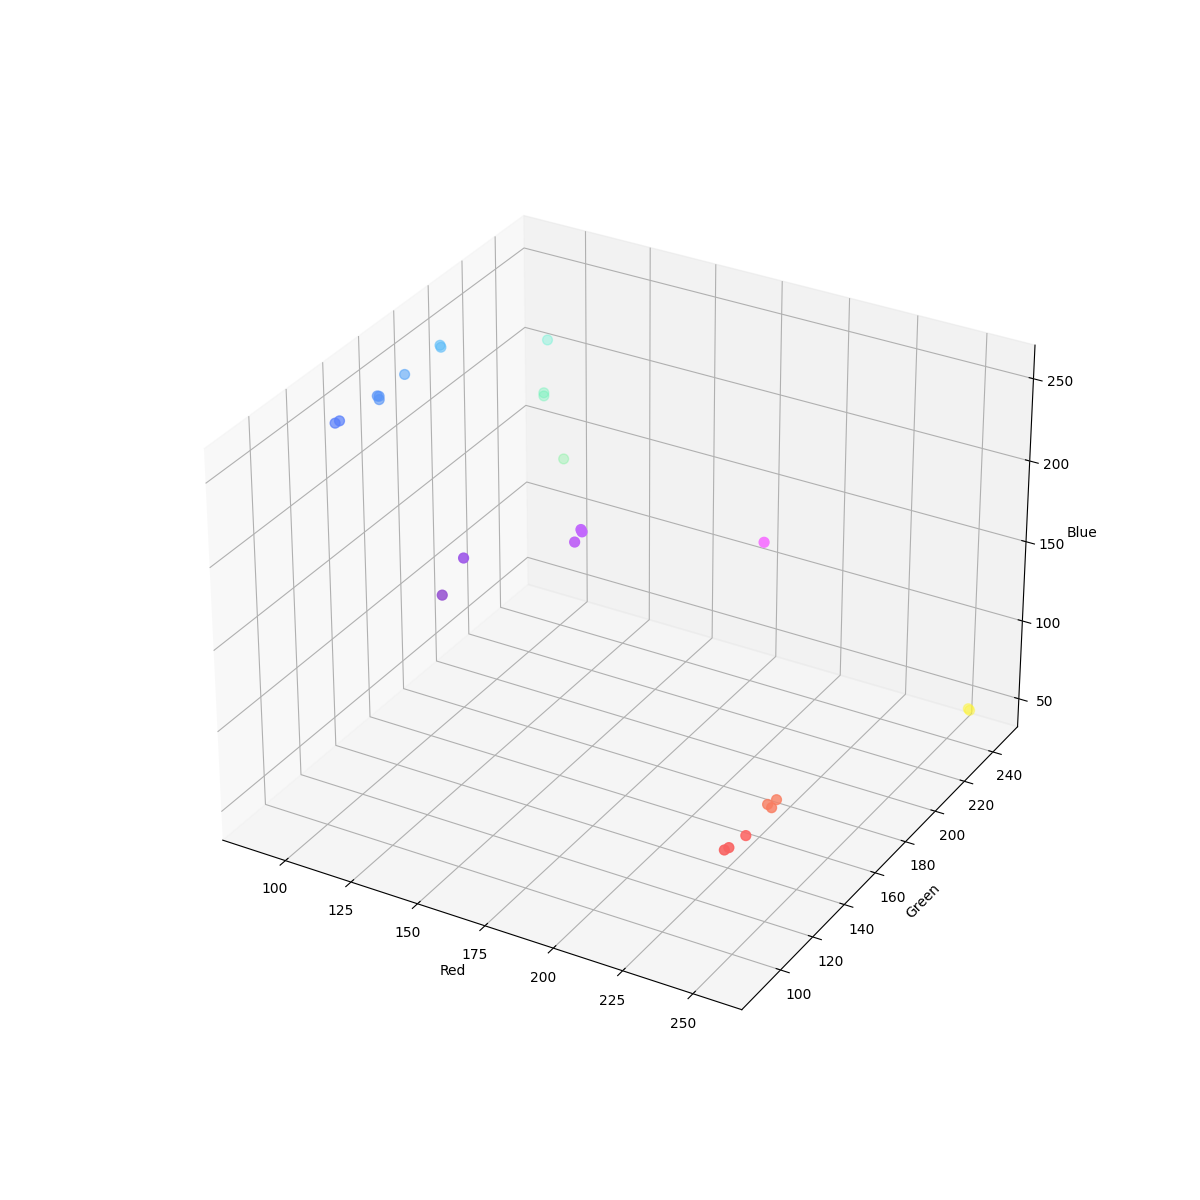

In [10]:
plot_pixel_distribution(good_pixels, s=50)

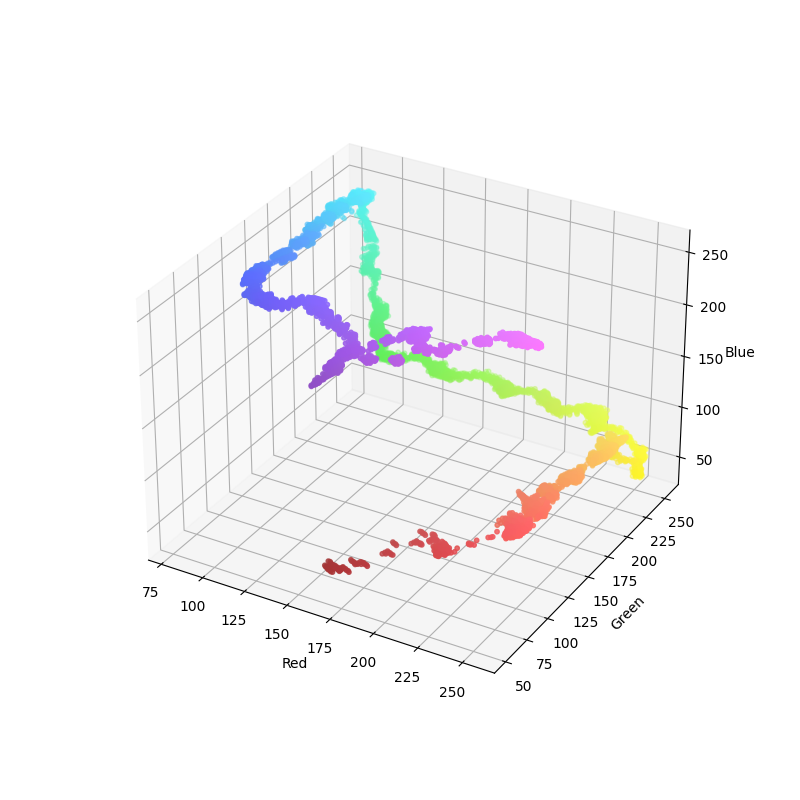

In [17]:
plot_pixel_distribution(unique_pixels, s=10)

In [11]:
pixel_distnp.where(normalized_counts >= n_hp)

NameError: name 'pixel_distnp' is not defined